**지도학습은 크게 분류와 회귀로 나뉜다.**

- 분류 : 샘플을 몇 개의 클래스 중 하나로 분류
- 회귀 : 임의의 어떤 숫자를 예측

<br>

**과대적합 vs 과소적합**

- 과대적합 : 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁜 경우
- 과소적합 : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우

<br>

**k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법**
- 과대적합일 때 이웃의 개수 k를 늘리는 것
- 과소적합일 때 이웃의 개수 k를 줄이는 것

<br>
<hr>

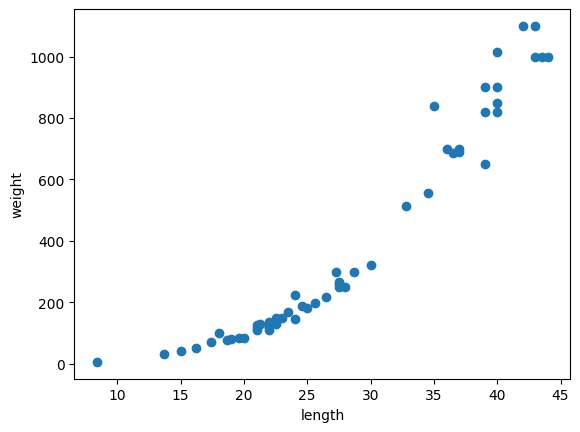

특성 (훈) : (42, 1)
특성 (테) : (14, 1)
결정계수 (훈) : 0.9804899950518966
결정계수 (테) : 0.9746459963987609

-- 생선의 길이를 알려주시면 도미인지 빙어인지 판단합니다. --

생선의 길이 : 40

입력하신 생선은 빙어입니다.


In [13]:
# 데이터 준비

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

# 특성 데이터를 x축에 놓고 타깃 데이터를 y축에 놓는다.

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 사이킷런에 사용할 특성데이터는 2차원 배열이므로 1차원 배열을 열이 있는 2차원 배열로 바꿔야한다.

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print("특성 (훈) :", train_input.shape,)
print("특성 (테) :", test_input.shape)

# 결정계수 (R의제곱)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

# 예측

from sklearn.metrics import mean_absolute_error

knr.n_neighbors = 3
knr.fit(train_input, train_target)

print("결정계수 (훈) :", knr.score(train_input, train_target))     # 결정계수 점수 - 훈련세트
print("결정계수 (테) :", knr.score(test_input, test_target))       # 결정계수 점수 - 테스트세트

# 예측하기

print("\n-- 생선의 길이를 알려주시면 도미인지 빙어인지 판단합니다. --\n")
input_l = input("생선의 길이 : ")

result = knr.predict([[int(input_l)]]);

if result == 1 : print("\n입력하신 생선은 도미입니다.")
else : print("\n입력하신 생선은 빙어입니다.")
